In [1]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
from descartes import PolygonPatch

In [6]:
censustract = gpd.read_file("/Users/chenjingqi/Dropbox/College/2017 Spring/STA 160/Gerrymandering/Census/Census Data/Tract_2010Census_DP1/Tract_2010Census_DP1.shp")

In [20]:
# California
censustractCA = gpd.read_file("/Users/chenjingqi/Dropbox/College/2017 Spring/STA 160/Gerrymandering/Census/Census Tract shp/CA/gz_2010_06_140_00_500k/gz_2010_06_140_00_500k.shp")

In [51]:
# North Carolina
censustractNC = gpd.read_file("/Users/chenjingqi/Dropbox/College/2017 Spring/STA 160/Gerrymandering/Census/Census Tract shp/NC/gz_2010_37_140_00_500k/gz_2010_37_140_00_500k.shp")

In [52]:
# Maryland
censustractMD = gpd.read_file("/Users/chenjingqi/Dropbox/College/2017 Spring/STA 160/Gerrymandering/Census/Census Tract shp/MD/gz_2010_24_140_00_500k/gz_2010_24_140_00_500k.shp")

In [14]:
race = [
'DP0080003',
'DP0080004',
'DP0080005',
'DP0080006',
'DP0080014',
'DP0080019',
'DP0080021',
'DP0080022',
'DP0080023',
'DP0080024']

In [15]:
name = [
  'White',
  'Black or African American',
  'American Indian and Alaska Native',
  'Asian',
  'Native Hawaiian and Other Pacific Islander',
  'Some Other Race',
  'White; American Indian and Alaska Native',
  'White; Asian',
  'White; Black or African American',
  'White; Some Other Race'
]

In [21]:
censustractCA['GEO_ID'] = [x.replace('1400000US', '') for x in censustractCA['GEO_ID']]

In [53]:
censustractNC['GEO_ID'] = [x.replace('1400000US', '') for x in censustractNC['GEO_ID']]

In [54]:
censustractMD['GEO_ID'] = [x.replace('1400000US', '') for x in censustractMD['GEO_ID']]

In [24]:
# California
CAcensus = censustract.merge(censustractCA, left_on='GEOID10', right_on='GEO_ID')

In [25]:
CAcensus = CAcensus.drop('geometry_y',1)

In [26]:
CAcensus.rename(columns={'geometry_x':'geometry'}, inplace=True)

In [27]:
CAcensus.rename(columns=dict(zip(race, name)), inplace=True)

In [45]:
# include needed variables
CAdata = CAcensus[name+['geometry','TRACT','CENSUSAREA']]
#CAcensus = GeoDataFrame(CAcensus[race], geometry=CAcensus['geometry'])

In [55]:
# North Carolina
NCcensus = censustract.merge(censustractNC, left_on='GEOID10', right_on='GEO_ID')

In [56]:
NCcensus = NCcensus.drop('geometry_y',1)

In [57]:
NCcensus.rename(columns={'geometry_x':'geometry'}, inplace=True)

In [58]:
NCcensus.rename(columns=dict(zip(race, name)), inplace=True)

In [59]:
# include needed variables
NCdata = NCcensus[name+['geometry','TRACT','CENSUSAREA']]
#NCcensus = GeoDataFrame(NCcensus[race], geometry=NCcensus['geometry'])

In [60]:
# Maryland
MDcensus = censustract.merge(censustractMD, left_on='GEOID10', right_on='GEO_ID')

In [61]:
MDcensus = MDcensus.drop('geometry_y',1)

In [62]:
MDcensus.rename(columns={'geometry_x':'geometry'}, inplace=True)

In [63]:
MDcensus.rename(columns=dict(zip(race, name)), inplace=True)

In [64]:
# include needed variables
MDdata = MDcensus[name+['geometry','TRACT','CENSUSAREA']]
#MDcensus = GeoDataFrame(MDcensus[race], geometry=MDcensus['geometry'])

In [65]:
# California Data
CAdata

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,White; American Indian and Alaska Native,White; Asian,White; Black or African American,White; Some Other Race,geometry,TRACT,CENSUSAREA
0,2212,97,55,289,5,1085,21,40,11,71,"POLYGON ((-120.417938 34.93834100000004, -120....",002103,1.096
1,6094,214,150,655,10,3740,48,67,46,238,POLYGON ((-120.4738929999999 34.92081400000006...,002402,6.289
2,1369,19,21,80,2,487,22,27,4,31,"POLYGON ((-120.417658 34.93834500000003, -120....",002102,0.522
3,3681,46,46,184,11,225,24,66,17,47,"POLYGON ((-120.411468 34.87961900000005, -120....",002010,0.934
4,3053,58,38,136,7,340,31,56,17,35,"POLYGON ((-120.423524 34.87928299999999, -120....",002009,1.005
5,5093,90,81,298,15,537,61,111,34,58,"POLYGON ((-120.410205 34.87990900000005, -120....",002008,1.272
6,6964,247,124,748,43,955,61,132,43,118,"POLYGON ((-120.435836 34.90542900000003, -120....",002007,2.050
7,1677,13,47,32,5,697,29,1,5,46,"POLYGON ((-121.937633 39.19346200000012, -121....",000500,65.722
8,3603,48,137,68,39,1004,36,23,12,87,"POLYGON ((-121.997799 39.2139840000001, -121.9...",000200,83.392
9,1772,49,82,21,6,509,19,4,11,10,"POLYGON ((-122.021633 39.413679, -122.019281 3...",000400,415.296


In [66]:
# North Carolina Data
NCdata

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,White; American Indian and Alaska Native,White; Asian,White; Black or African American,White; Some Other Race,geometry,TRACT,CENSUSAREA
0,1894,1500,61,26,0,120,21,2,18,17,"POLYGON ((-79.56728699999991 34.994798, -79.56...",970100,95.090
1,2970,1315,78,30,0,436,24,4,21,24,POLYGON ((-79.71752599999991 35.17359599999997...,970200,176.733
2,3443,1462,133,47,5,135,45,2,30,11,POLYGON ((-79.76772999999997 34.85600800000009...,970800,53.807
3,4095,761,151,45,3,100,37,5,21,7,POLYGON ((-79.76772999999997 34.85600800000009...,970900,9.000
4,1732,2199,55,36,7,41,23,8,25,4,POLYGON ((-79.69038399999999 34.89384500000011...,971000,19.009
5,2255,1658,274,11,1,30,90,2,26,5,"POLYGON ((-79.5684 34.99508800000007, -79.5676...",971100,62.215
6,3534,968,106,34,5,175,30,1,11,5,POLYGON ((-79.83058499999999 34.91775200000001...,970300,39.294
7,2803,1136,73,79,0,59,29,13,17,5,"POLYGON ((-79.72185499999995 34.985094, -79.72...",970400,7.453
8,1811,1774,91,73,0,333,16,1,23,14,POLYGON ((-79.70793900000001 34.90975700000001...,970600,6.458
9,2258,453,112,10,4,211,31,4,23,17,POLYGON ((-79.76733000000002 34.91213800000003...,970700,3.136


In [67]:
# Maryland Data
MDdata

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,White; American Indian and Alaska Native,White; Asian,White; Black or African American,White; Some Other Race,geometry,TRACT,CENSUSAREA
0,3233,313,8,37,2,186,11,7,17,7,POLYGON ((-75.91434199999998 39.27835499999998...,950100,65.875
1,3875,750,9,14,0,112,8,4,37,17,POLYGON ((-76.14811499999996 39.34250600000007...,950200,107.794
2,4356,1104,15,103,2,72,16,26,56,5,POLYGON ((-76.04124300000001 39.25461200000012...,950300,8.280
3,2332,237,2,4,0,5,10,7,24,0,POLYGON ((-76.19993599999992 39.04539899999997...,950500,28.084
4,2373,652,8,7,2,18,5,0,31,2,POLYGON ((-76.03959299999991 39.17347899999999...,950400,66.996
5,0,0,0,0,0,0,0,0,0,0,POLYGON ((-76.35236299999997 39.07039600000002...,990000,0.000
6,2296,394,26,9,0,5,17,8,25,0,POLYGON ((-77.12649299999998 38.53929199999999...,850500,37.912
7,2726,1663,29,166,3,36,4,23,32,2,POLYGON ((-77.03919500000001 38.55122800000009...,850600,23.276
8,6424,2183,43,237,10,75,31,68,78,14,POLYGON ((-76.93396799999994 38.56043500000004...,851002,16.463
9,2191,398,25,31,0,24,25,12,21,1,"POLYGON ((-76.999574 38.40337400000004, -77.00...",851100,27.666


## Plot

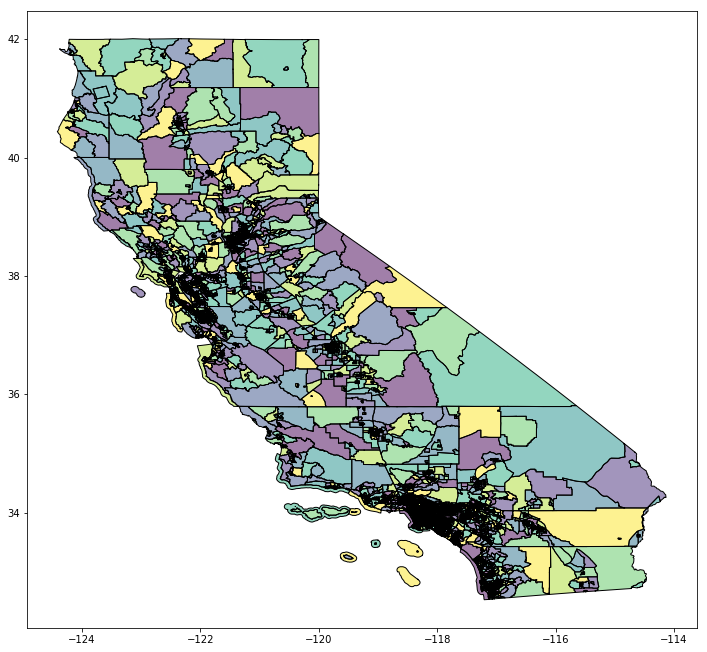

In [48]:
plt.rcParams['figure.figsize'] = (12, 12)
CAcensus.plot()

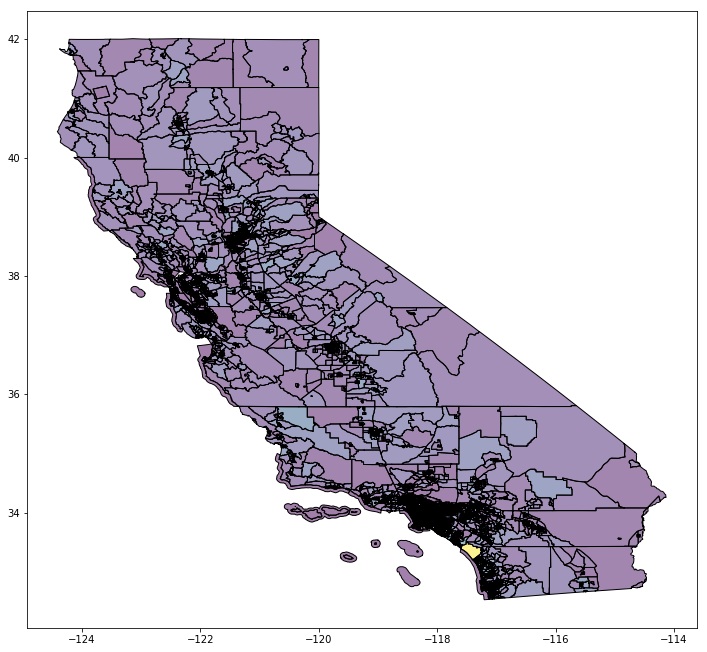

In [63]:
CAcensus.plot(column='White', shade = )

In [11]:
type(CAcensus)

pandas.core.frame.DataFrame

In [71]:
max_white = np.max(CAcensus['White'])

In [ ]:
# initialize the plot
plt.clf()

# define the figure and set the facecolor (e.g. background) to white
fig = plt.figure(facecolor='white')

# ad a subplot called 'ax'
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

# use a blue colour ramp ('Blues') - we'll be converting it to a map using cmap()
# you could also use 'Oranges' or 'Greens' 
cmap = plt.get_cmap('Blues')


# draw district with grey outlines
CAcensus['patches'] = CAcensus['geometry'].map(lambda x: PolygonPatch(x, ec='#555555', lw=.2, alpha=1., zorder=4))


# set the PatchCollection with our defined 'patches'
pc = PatchCollection(CAcensus['patches'], match_original=True)

# impose our color map onto the patch collection
#cmap
pc.set_facecolor(cmap(CAcensus['White']))
#pc.set_alpha(CAcensus['White']/max_white)
ax.add_collection(pc)

# set the layout to maximally fit the bounding area
plt.tight_layout()

# define the size of the figure
fig.set_size_inches(5,6)

# save the figure. Increase the dpi to increase the quality of the output .png. For example, dpi=1000 is super high quality
# note that the figure will be saved as 'sri_lanka_' then the name of the variable under analysis
# you can change this to whatever you want
#plt.savefig('sri_lanka_' + var_2_analyze + '.png', dpi=100, alpha=True)

In [22]:
%matplotlib inline
# Make plots larger.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.collections import PolyCollection
from matplotlib.colors import Normalize

import geopandas as gpd
import numpy as np

In [13]:
import fiona
import shapely
import shapely.geometry

In [ ]:
CAcensus.plot(column='White', shade = )

In [36]:
max_white = np.max(CAcensus['White'])

In [37]:
fig, ax = plt.subplots(figsize=(200,200))

#cmap = plt.get_cmap('Blues')   

#norm = Normalize()
BLUE = '#6699cc'

for i in range(len(CAcensus['geometry'])):
    ax.add_patch(PolygonPatch(CAcensus['geometry'][i], fc=BLUE, ec=BLUE, alpha=CAcensus['White'][i]/max_white, zorder=2 ))
    
#geom = CAcensus['geometry']
#pc = PatchCollection(patches)#, cmap=matplotlib.cm.jet, alpha=0.4)
#pc = CAcensus['geometry']
#patch = []
#for i in range(len(geom)):
#    polygon = PolygonPatch(geom[i])
#    patch.append(polygon)
#shapes = [Polygon(np.array(geometry), True) for geometry in CAcensus]
#    pc = 
#CAcensus['patches'] = CAcensus['geometry'].map(lambda x: PolygonPatch(x))#, ec='#555555', lw=.2, alpha=1., zorder=4))
#shapes =  [Polygon(np.array(geometry), True) for geometry in CAcensus]
#shape = shapely.geometry.shape(CAcensus['geometry'])
#geom = PolygonPatch(CAcensus.geometry)
#pc = PatchCollection(patches)
#pc.set_facecolor(cmap(norm(CAcensus.White)))
#ax.add_collection(pc)

#mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
#mapper.set_array(CAcensus.White)
#plt.colorbar(mapper, shrink=0.4)
# display our plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(200,200))

house = Basemap(llcrnrlon=-122.7, llcrnrlat=37.5, urcrnrlon=-122, urcrnrlat=38, resolution="h",
    projection="merc")

house.drawcoastlines()
house.drawcounties()

house.readshapefile("/Users/chenjingqi/Dropbox/College/2017 Winter/STA 141B/Jupyter/HW/Assignment 6/cb_2015_us_zcta510_500k/cb_2015_us_zcta510_500k", "zipcodes")
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(geometry), True) for geometry in house.zipcodes],
        'area': [int(zipcodes['ZCTA5CE10']) for zipcodes in house.zipcodes_info]
    })
df_poly=pd.merge(df_poly,zillow,left_on='area',right_on='RegionName',how='inner')
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()
 
pc.set_facecolor(cmap(norm(df_poly['MedianSoldPricePerSqft_AllHomes'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(df_poly['MedianSoldPricePerSqft_AllHomes'])
plt.colorbar(mapper, shrink=0.4)
plt.show()

In [ ]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

# use a blue colour ramp - we'll be converting it to a map using cmap()
cmap = plt.get_cmap('Blues')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#555555', lw=.2, alpha=1., zorder=4))